In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams["figure.dpi"] = 300

rng = np.random.RandomState(1)


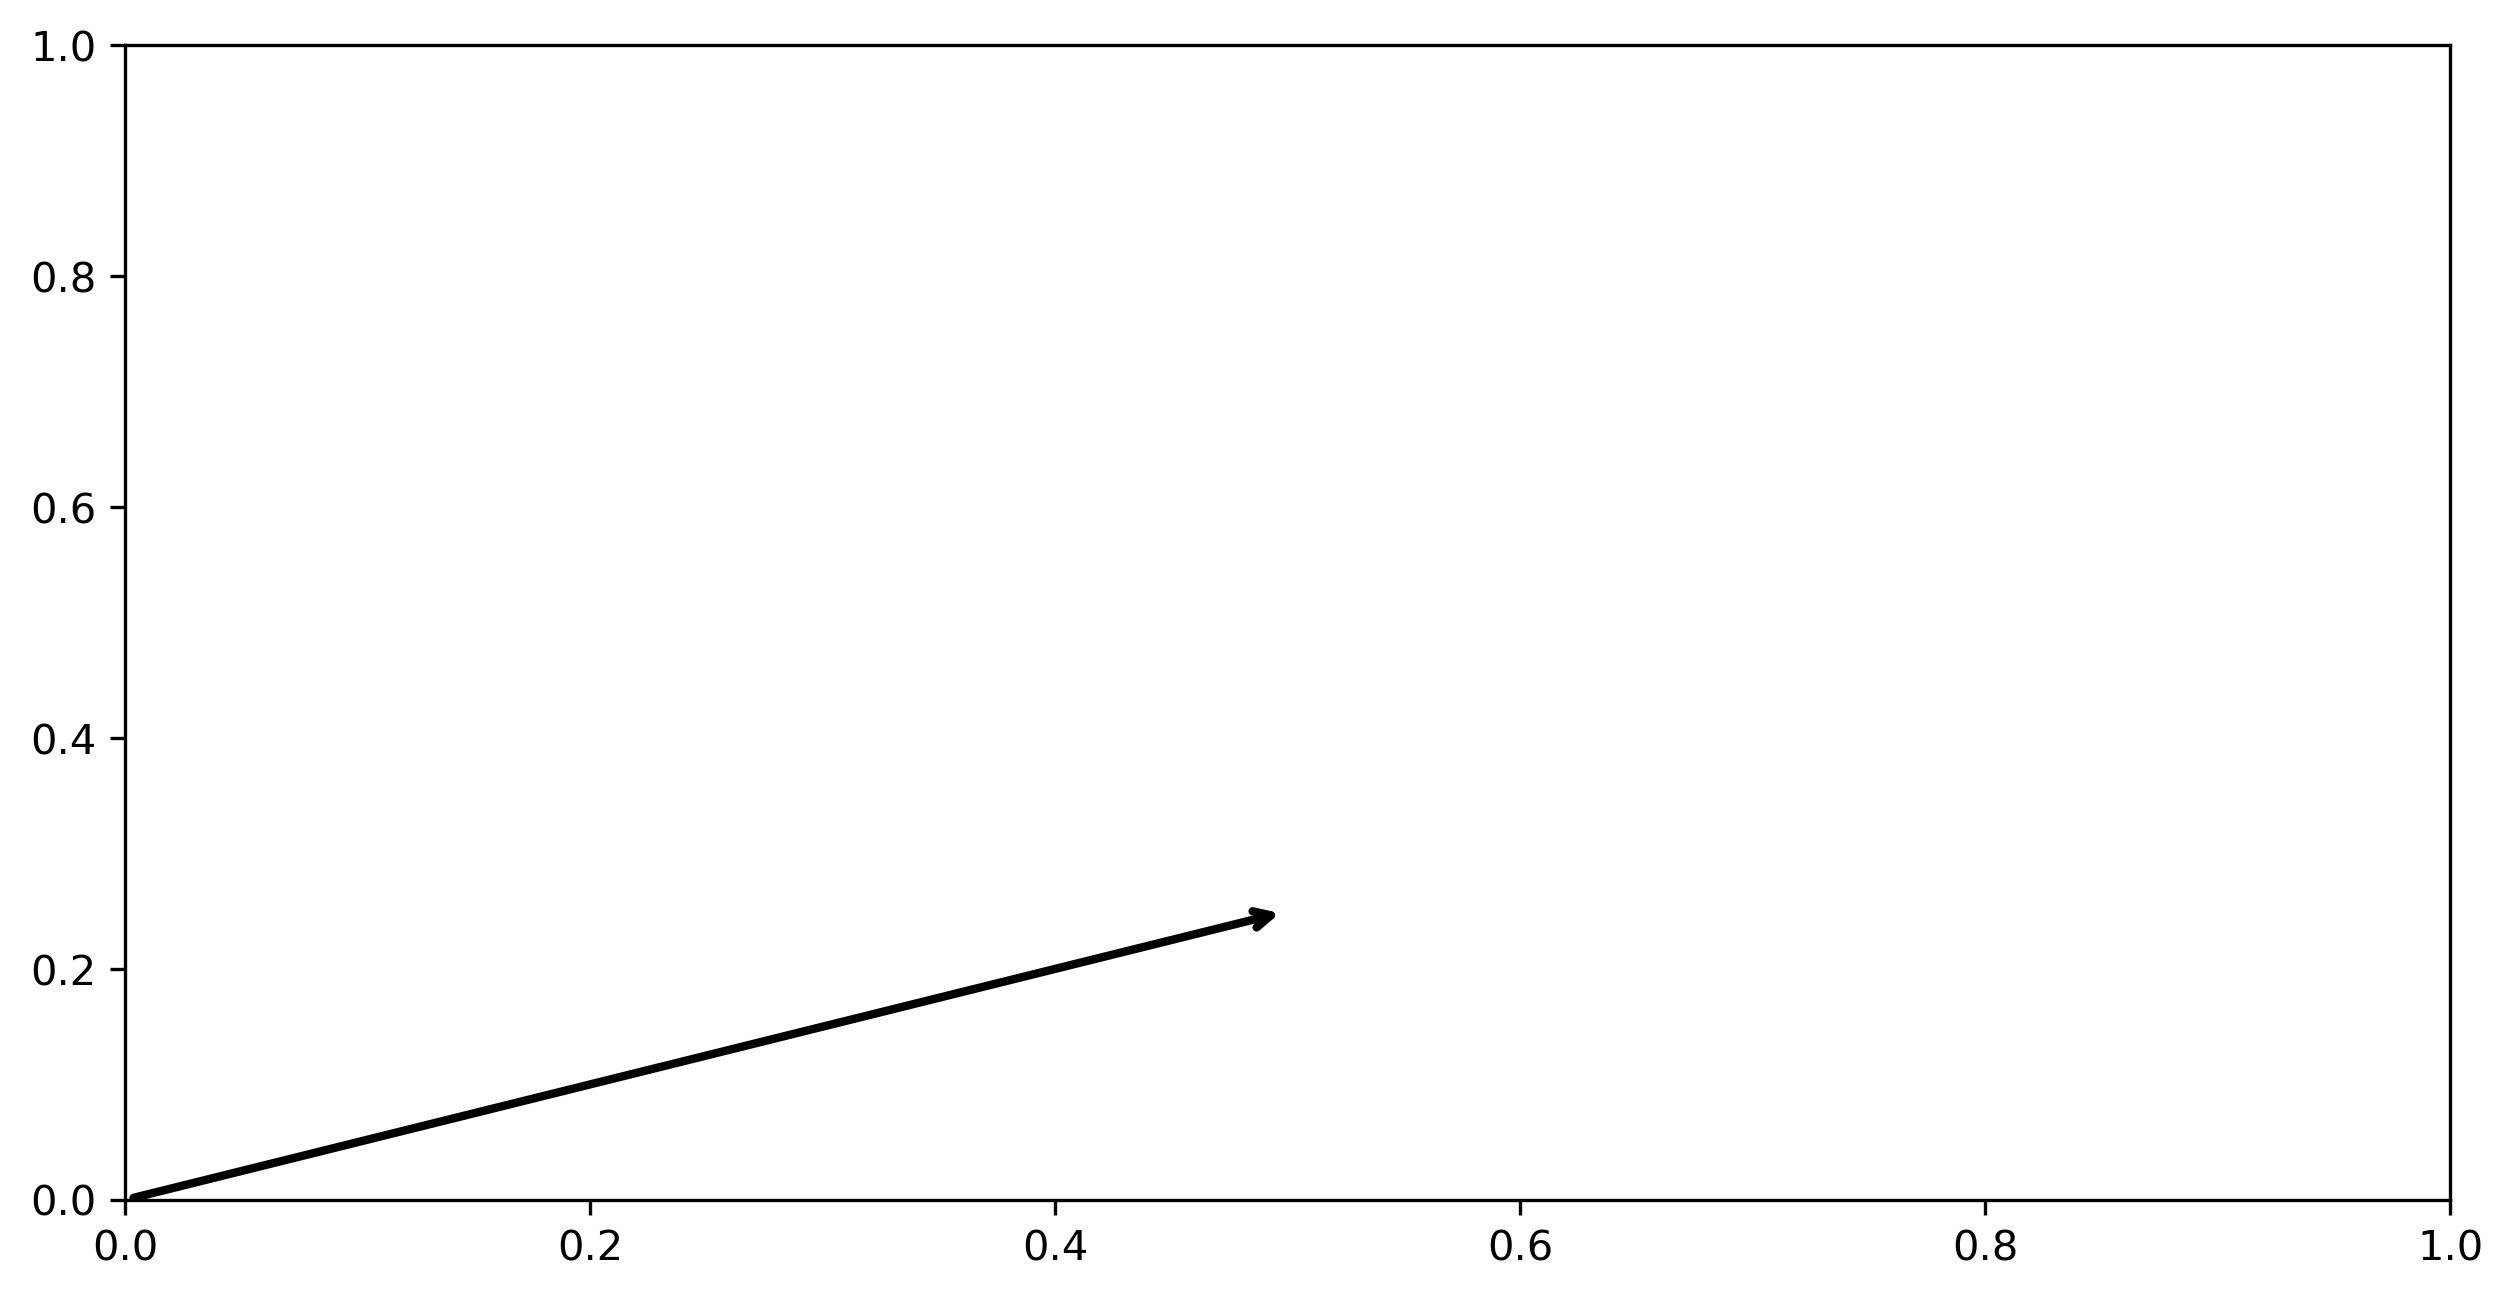

In [2]:
def draw_vector (p0, p1, ax):
    ax.annotate(
        '',  #testo
        p1,
        p0,
        arrowprops={
            "arrowstyle" : "->",
            "linewidth" : 2
            
        }
    )
    
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
draw_vector([0, 0], [0.5, 0.25], ax)

In [3]:
X1 = rng.rand(2, 2)
print(X1.shape)
X1

X2 = rng.randn(2, 100)
print(X2.shape)

X = np.dot(X1, X2).T

print(X.shape)

(2, 2)
(2, 100)
(100, 2)


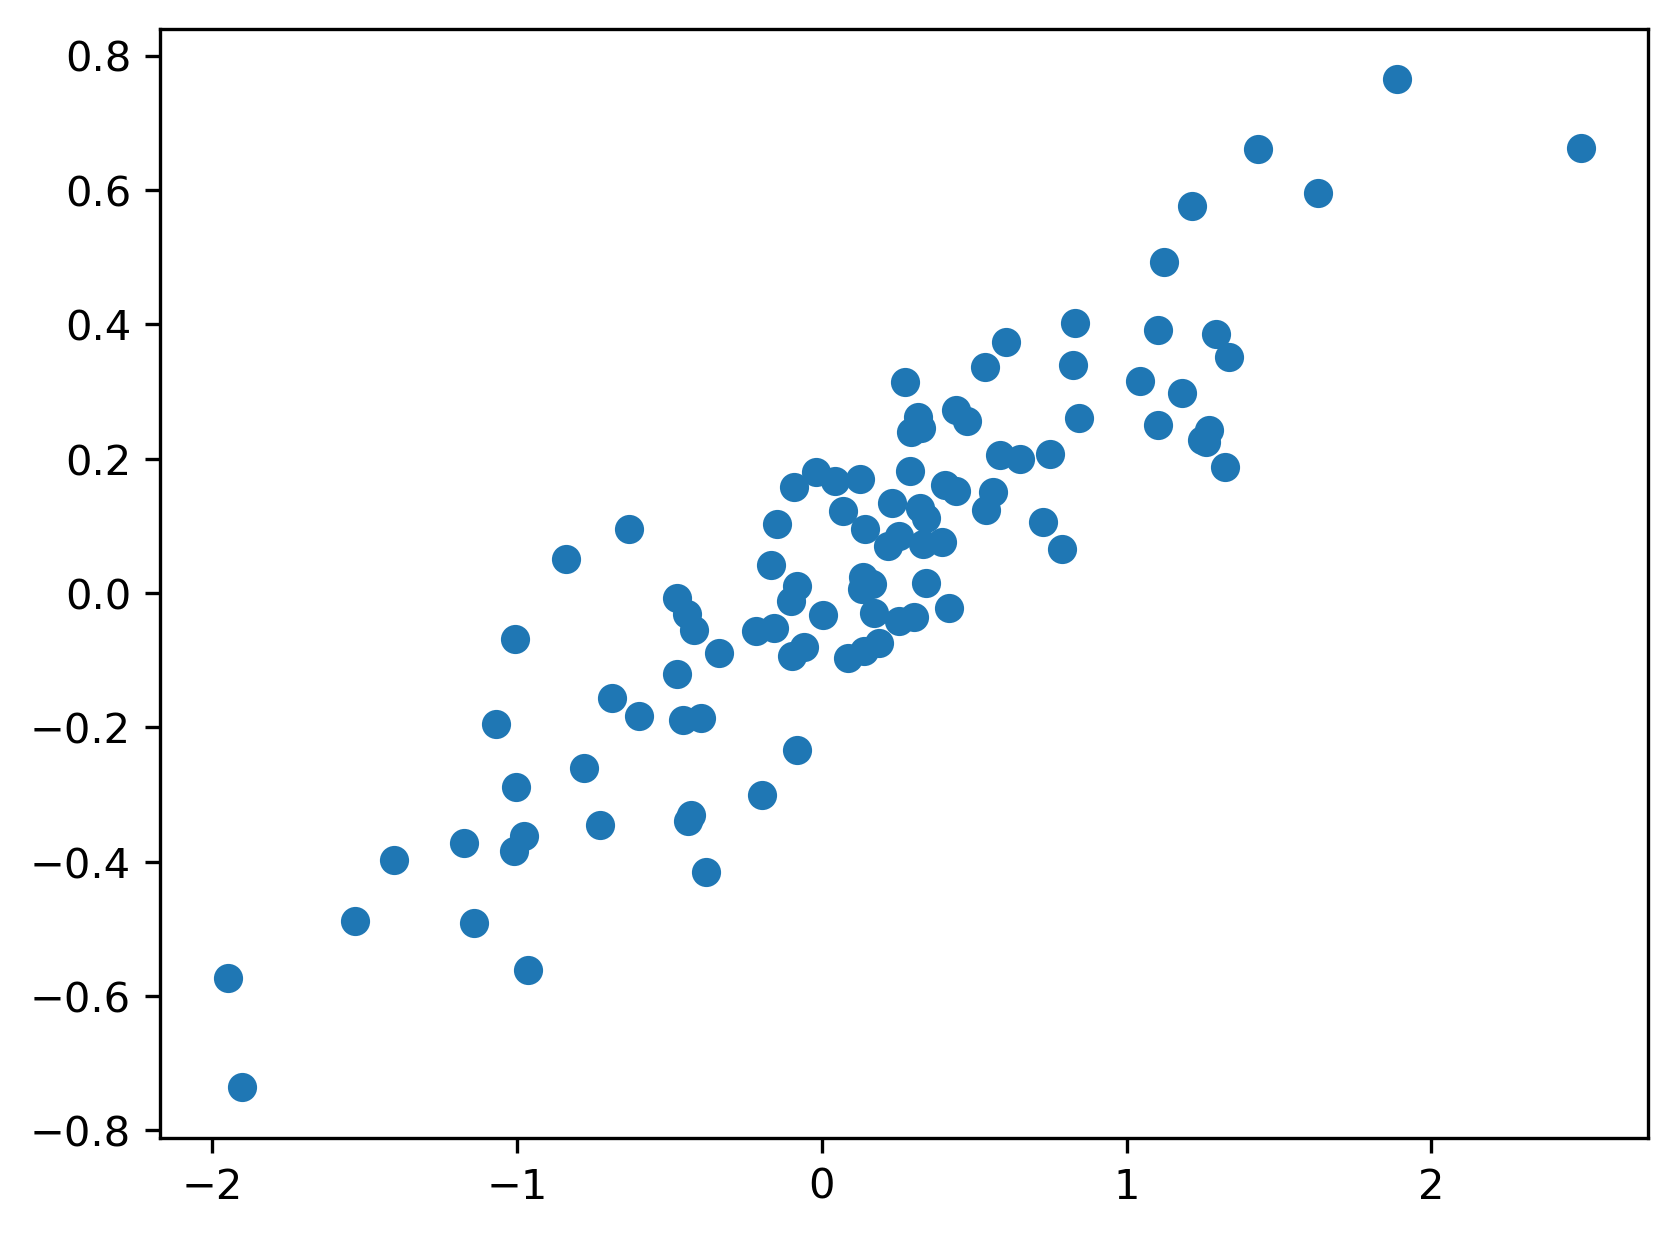

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
pca = PCA()
pca.fit(X)

PCA()

In [6]:
print(pca.components_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]


In [7]:
print(pca.explained_variance_)

[0.71323427 0.01483411]


In [8]:
for magnitude, direction in zip(pca.explained_variance_, pca.components_):
    print(f"Variance -> {magnitude}")
    print(f"PCA x component -> {direction[0]}")
    print(f"PCA y component -> {direction[1]}")
    
    print("\n")

Variance -> 0.7132342735560837
PCA x component -> 0.9525725183950094
PCA y component -> 0.30431167772300377


Variance -> 0.014834114209194782
PCA x component -> -0.30431167772300377
PCA y component -> 0.9525725183950094




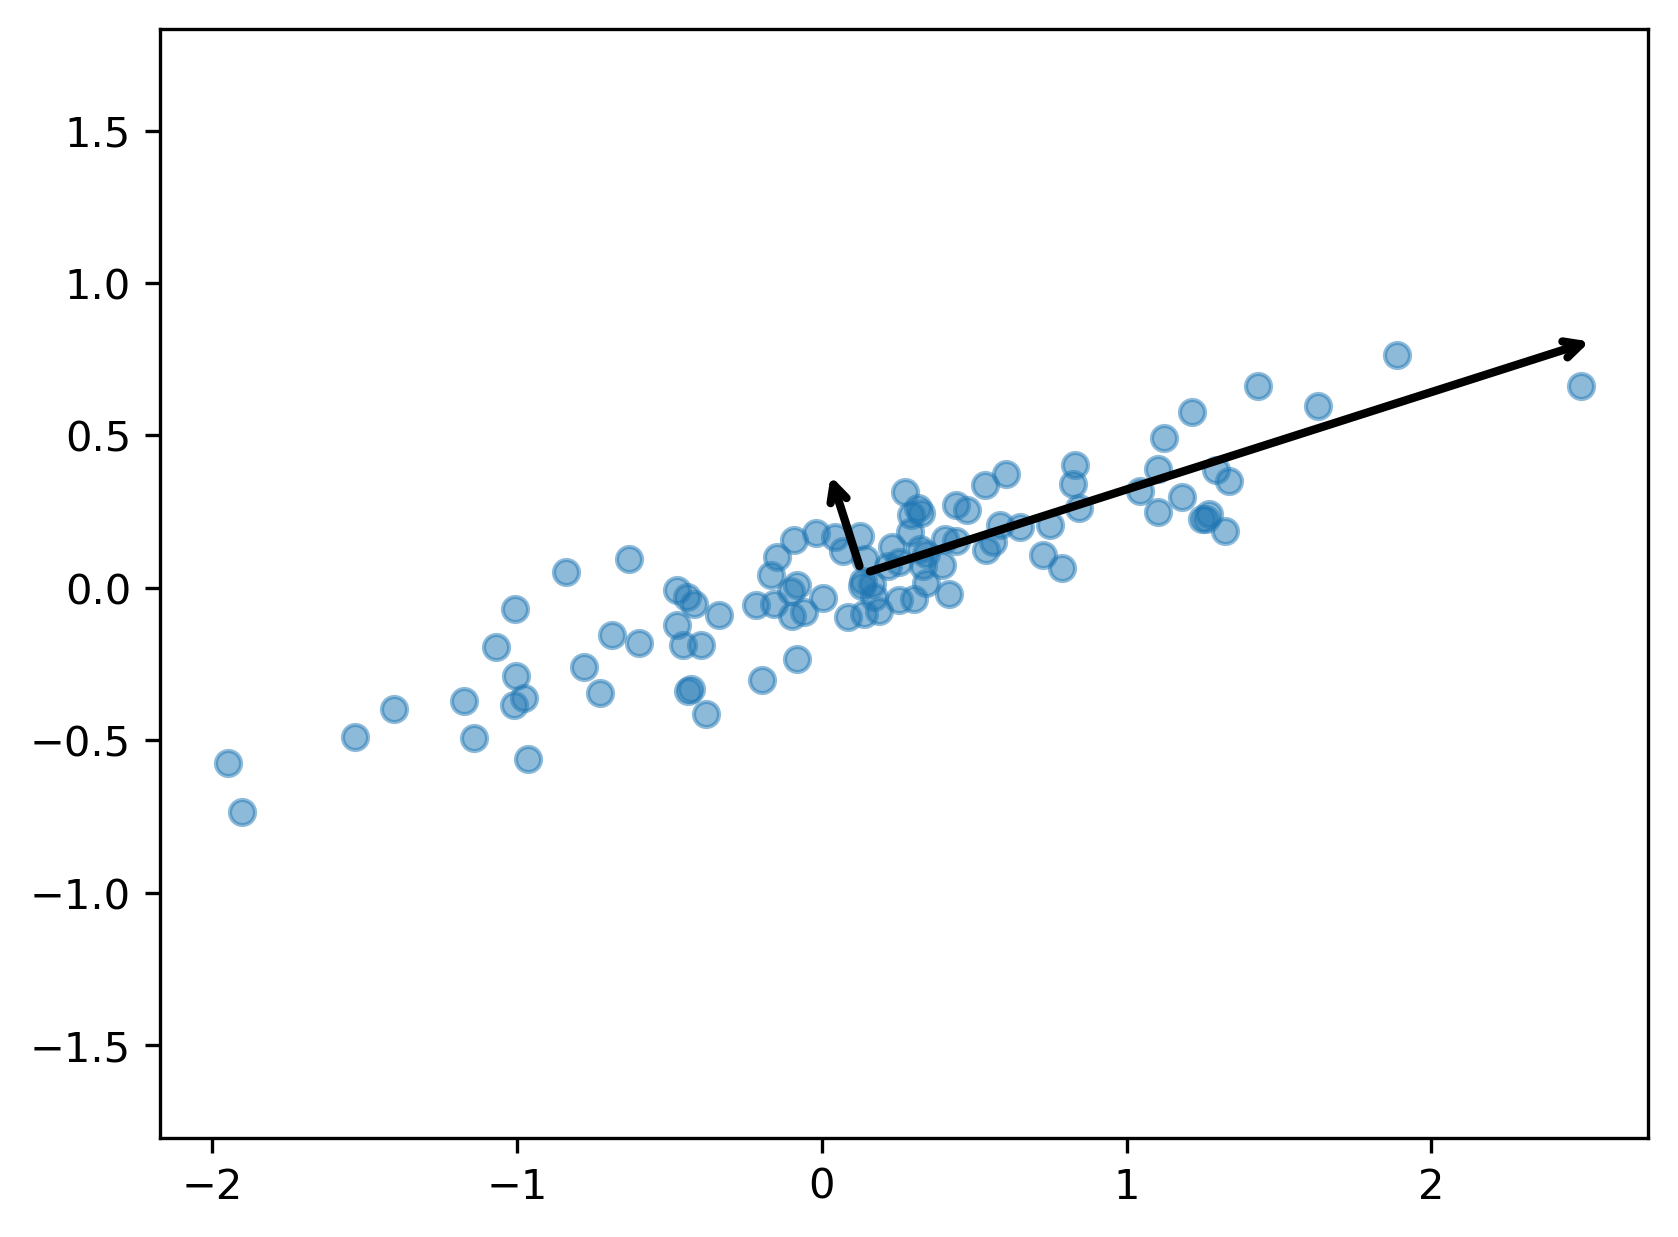

In [9]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)


for magnitude, direction in zip(pca.explained_variance_, pca.components_):
    v = direction * 3 * np.sqrt(magnitude)
    draw_vector(pca.mean_, pca.mean_ + v, plt.gca())
    
    plt.axis("equal")

In [18]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=2)

labels = [ "PC" + str(x + 1) for x in range(0, len(per_var)) ]
print(labels)

['PC1', 'PC2']


Text(0.5, 1.0, 'Barplot')

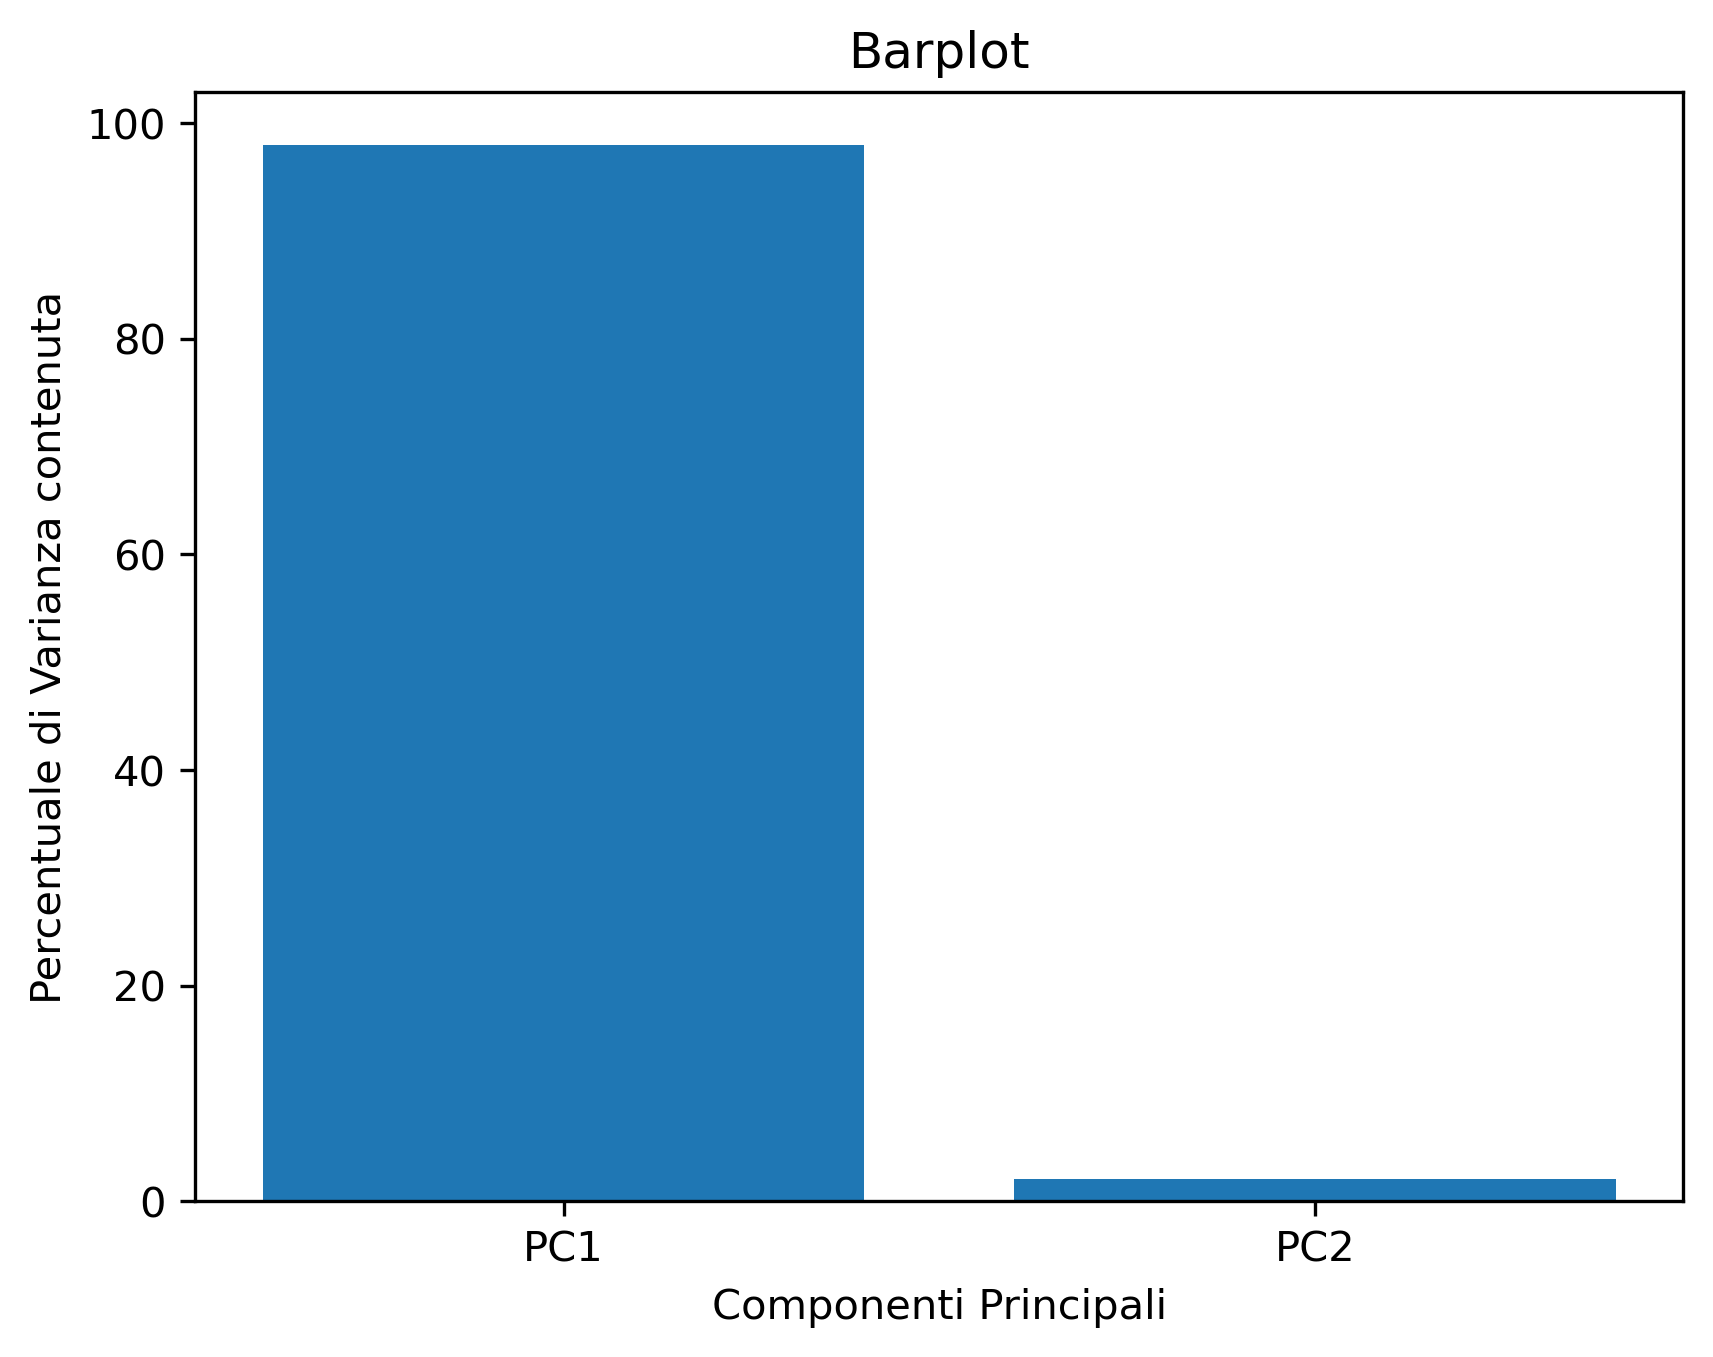

In [22]:
plt.bar(x=range(0, len(per_var)), height=per_var, tick_label=labels)
plt.ylabel("Percentuale di Varianza contenuta")
plt.xlabel("Componenti Principali")
plt.title("Barplot")

In [27]:
pca_data = pca.transform(X)

pca_df = pd.DataFrame(pca_data, columns=labels)

pca_df.head()

,PC1,PC2
0,-0.035125,0.091843
1,-0.103642,0.173997
2,-0.647491,-0.187933
3,-0.921821,0.300593
4,1.130174,-0.173175


Text(0, 0.5, 'PC1 - 2.04%')

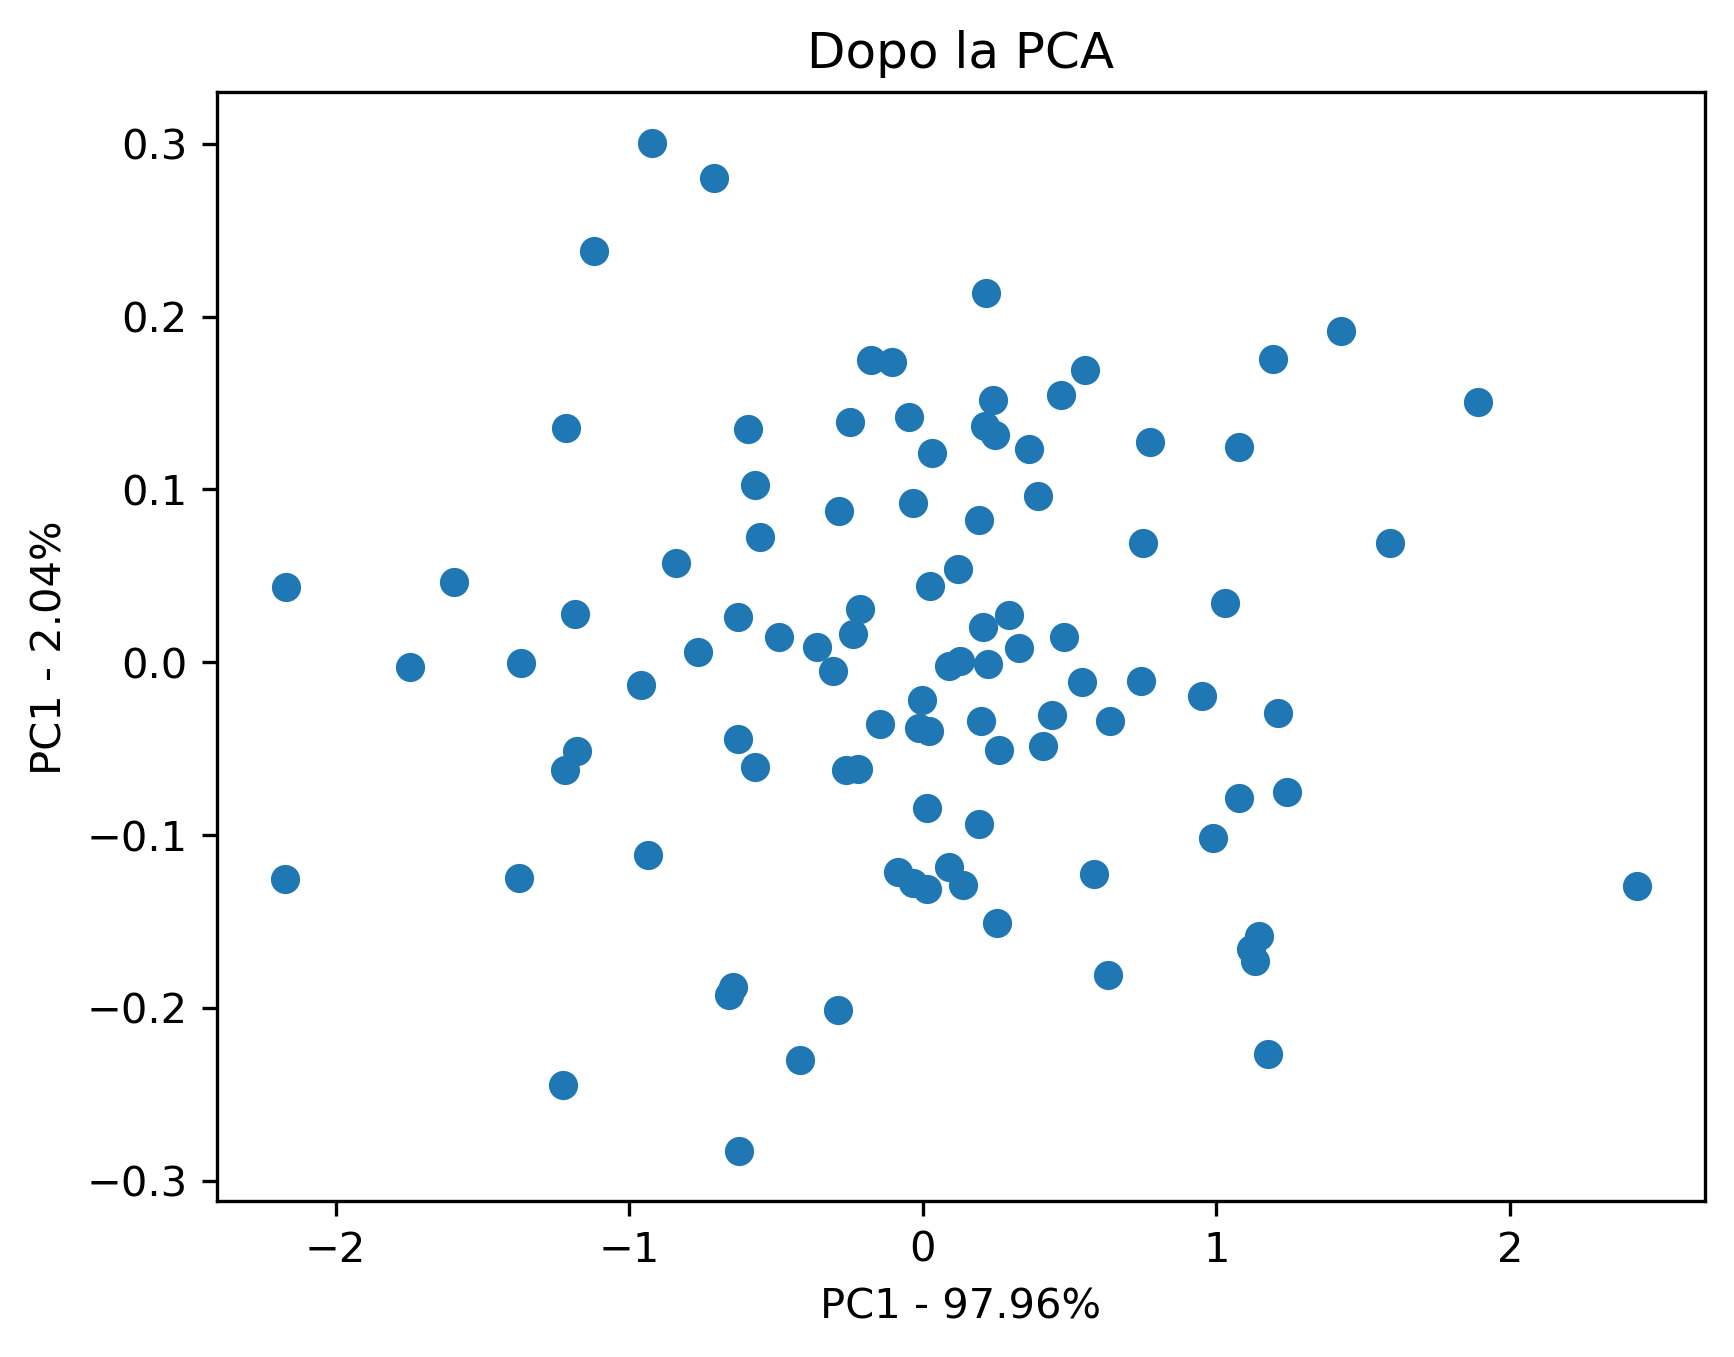

In [30]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("Dopo la PCA")
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC1 - {per_var[1]}%")